In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately 
   to create a 360-degree view of the data. Use the same for the subsequent questions.

In [2]:
claims = pd.read_csv("claims.csv")
cust_demo = pd.read_csv("cust_demographics.csv")

In [3]:
claims.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
cust_demo.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [5]:
cust_360 = pd.merge(right = claims, left = cust_demo, right_on = "customer_id", left_on = "CUST_ID", how = "outer")
cust_360.drop(columns = ["customer_id"], inplace = True)

In [6]:
cust_360

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102,NaN,NaN,NaN,NaN,NaN,NaN,97727122.0,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1103,NaN,NaN,NaN,NaN,NaN,NaN,10247193.0,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1104,NaN,NaN,NaN,NaN,NaN,NaN,79807493.0,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1105,NaN,NaN,NaN,NaN,NaN,NaN,69299345.0,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [7]:
cust_360.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1092 non-null   float64
 1   gender               1092 non-null   object 
 2   DateOfBirth          1092 non-null   object 
 3   State                1092 non-null   object 
 4   Contact              1092 non-null   object 
 5   Segment              1092 non-null   object 
 6   claim_id             1100 non-null   float64
 7   incident_cause       1100 non-null   object 
 8   claim_date           1100 non-null   object 
 9   claim_area           1100 non-null   object 
 10  police_report        1100 non-null   object 
 11  claim_type           1100 non-null   object 
 12  claim_amount         1035 non-null   object 
 13  total_policy_claims  1090 non-null   float64
 14  fraudulent           1100 non-null   object 
dtypes: float64(3), object(12)
memory usage

2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of 
   the columns and their business significance.

In [8]:
cust_360.dtypes

CUST_ID                float64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id               float64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

In [9]:
cust_360["DateOfBirth"] = pd.to_datetime(cust_360.DateOfBirth, format = "%d-%b-%y")
cust_360.loc[(cust_360.DateOfBirth.dt.year > 2020),"DateOfBirth"]=cust_360[cust_360.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))
cust_360["claim_date"] = pd.to_datetime(cust_360.claim_date, format = "%m/%d/%Y")
cust_360["Contact"] = pd.to_numeric(cust_360.Contact.str.replace("-",""),downcast='float')
cust_360["claim_amount"] = pd.to_numeric(cust_360.claim_amount.str.replace("$",""),downcast='float')
cust_360.head()

C:\Users\nihal\AppData\Local\Temp\ipykernel_1712\2627494647.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_360["claim_amount"] = pd.to_numeric(cust_360.claim_amount.str.replace("$",""),downcast='float')


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No


In [10]:
cust_360.dtypes

CUST_ID                       float64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                       float64
Segment                        object
claim_id                      float64
incident_cause                 object
claim_date             datetime64[ns]
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                  float32
total_policy_claims           float64
fraudulent                     object
dtype: object

4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [11]:
cust_360["flag"] = np.where(cust_360.police_report == "No", 0 , np.where(cust_360.police_report == "Yes", 1, np.nan))
cust_360.drop(columns = ["police_report"], inplace = True)
cust_360.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,NaN
2,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,53522022.0,Other driver error,2018-02-02,Auto,Material only,3369.5,1.0,Yes,0.0
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0
4,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,13015401.0,Natural causes,2018-06-17,Auto,Material only,1680.0,1.0,No,0.0


5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved.
   However, customer ID should remain unique. Retain the most recent observation and delete any duplicated records in
   the data based on the customer ID column.

In [12]:
cust_360.drop_duplicates(subset = 'CUST_ID',keep = 'last', inplace = True)
cust_360

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,NaN
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0
5,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,91609100.0,Natural causes,2017-04-12,Auto,Material only,1440.0,1.0,No,NaN
7,19269962.0,Male,1977-05-13,NV,9.568719e+09,Gold,39219616.0,Other causes,2018-09-26,Auto,Material only,2240.0,2.0,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,42364152.0,Female,1996-07-07,ID,5.294622e+09,Silver,63269067.0,Other causes,2017-05-09,Home,Material only,2800.0,1.0,No,0.0
1089,19888166.0,Male,1990-04-11,WI,7.126520e+09,Gold,22690595.0,Other driver error,2017-05-15,Auto,Injury only,33080.0,2.0,No,1.0
1090,11256802.0,Female,1964-10-22,LA,4.693456e+09,Silver,12376894.0,Other driver error,2017-04-18,Auto,Material only,2840.0,4.0,No,0.0
1091,61575264.0,Male,1995-07-12,WY,1.823851e+09,Gold,63226031.0,Natural causes,2017-03-16,Auto,Material only,1490.0,1.0,No,0.0


6. Check for missing values and impute the missing values with an appropriate value.
   (mean for continuous and mode for categorical)

In [13]:
cust_360.isna().sum()

CUST_ID                  1
gender                   1
DateOfBirth              1
State                    1
Contact                  1
Segment                  1
claim_id                 7
incident_cause           7
claim_date               7
claim_area               7
claim_type               7
claim_amount            72
total_policy_claims     17
fraudulent               7
flag                   302
dtype: int64

In [14]:
cust_360.dropna(subset=['CUST_ID'], inplace = True)

In [15]:
cust_360.isna().sum()

CUST_ID                  0
gender                   0
DateOfBirth              0
State                    0
Contact                  0
Segment                  0
claim_id                 7
incident_cause           7
claim_date               7
claim_area               7
claim_type               7
claim_amount            72
total_policy_claims     17
fraudulent               7
flag                   302
dtype: int64

In [16]:
catagorical_col = ["incident_cause","claim_area","claim_type","fraudulent","flag"]
continious_col = ["claim_amount"]

In [17]:
for col in catagorical_col:
    cust_360[col] = cust_360[col].fillna(cust_360[col].mode()[0])
    cust_360[continious_col] = cust_360[continious_col].fillna(cust_360[continious_col].mean())
cust_360.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,0.0
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0
5,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,91609100.0,Natural causes,2017-04-12,Auto,Material only,1440.0,1.0,No,0.0
7,19269962.0,Male,1977-05-13,NV,9.568719e+09,Gold,39219616.0,Other causes,2018-09-26,Auto,Material only,2240.0,2.0,No,0.0


In [18]:
cust_360.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                7
incident_cause          0
claim_date              7
claim_area              0
claim_type              0
claim_amount            0
total_policy_claims    17
fraudulent              0
flag                    0
dtype: int64

7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
   #### Children < 18
   #### Youth 18-30
   #### Adult 30-60
   #### Senior > 60

In [19]:
cust_360["Age"] = round((cust_360.claim_date - cust_360.DateOfBirth).apply(lambda x: x.days)/365.25, 0)
cust_360.head(3)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0,39.0
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,0.0,49.0
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0,34.0


In [20]:
cust_360["Age_grp"] = np.where(cust_360.Age < 18, "Children", np.where(cust_360.Age < 30, "Youth", np.where(cust_360.Age < 60, "Adult", 
                     np.where(cust_360.Age < 100, "Senior", "NaN"))))
cust_360["Age_grp"] = cust_360["Age_grp"].fillna(cust_360["Age_grp"].mode())
cust_360.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,incident_cause,claim_date,claim_area,claim_type,claim_amount,total_policy_claims,fraudulent,flag,Age,Age_grp
0,21868593.0,Female,1979-01-12,VT,7.899168e+09,Platinum,54004764.0,Driver error,2017-11-27,Auto,Material only,2980.0,1.0,No,0.0,39.0,Adult
1,75740424.0,Female,1970-01-13,ME,2.655431e+09,Silver,33985796.0,Crime,2018-10-03,Home,Material only,2980.0,3.0,No,0.0,49.0,Adult
3,30308357.0,Female,1984-03-11,TN,7.986315e+09,Silver,63017412.0,Driver error,2018-04-04,Auto,Material only,1950.0,6.0,No,0.0,34.0,Adult
5,47830476.0,Female,1986-05-01,MA,4.131878e+09,Silver,91609100.0,Natural causes,2017-04-12,Auto,Material only,1440.0,1.0,No,0.0,31.0,Adult
7,19269962.0,Male,1977-05-13,NV,9.568719e+09,Gold,39219616.0,Other causes,2018-09-26,Auto,Material only,2240.0,2.0,No,0.0,41.0,Adult


8. What is the average amount claimed by the customers from various segments?

In [21]:
cust_360.groupby(by = "Segment")[["claim_amount"]].mean()

,claim_amount
Segment,
Gold,12845.458008
Platinum,12372.715820
Silver,12269.160156


9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior
   to 1st of October, 2018.

In [22]:
cust_360.loc[cust_360.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("Total_")

incident_cause
Total_Crime                 7.219374e+05
Total_Driver error          3.315848e+06
Total_Natural causes        1.312745e+06
Total_Other causes          3.723147e+06
Total_Other driver error    3.277533e+06
Name: claim_amount, dtype: float32

10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [23]:
cust_360.loc[(cust_360.incident_cause.str.lower().str.contains("driver") & ((cust_360.State == "TX") | (cust_360.State == "DE") | (cust_360.State == "AK"))),:].groupby(by = "State")["State"].count()

State
AK    10
DE    15
TX    10
Name: State, dtype: int64

11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a       percentage on the pie chart.

In [24]:
gender_segment = cust_360.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()
gender_segment

,gender,Segment,claim_amount
0,Female,Gold,2122544.000
1,Female,Platinum,2382222.000
2,Female,Silver,1934806.375
3,Male,Gold,2655966.750
4,Male,Platinum,2121446.500
5,Male,Silver,2347130.750


In [25]:
gender_segment = gender_segment.pivot(index = "Segment", columns = "gender", values = "claim_amount")
gender_segment

gender,Female,Male
Segment,,
Gold,2122544.000,2655966.75
Platinum,2382222.000,2121446.50
Silver,1934806.375,2347130.75


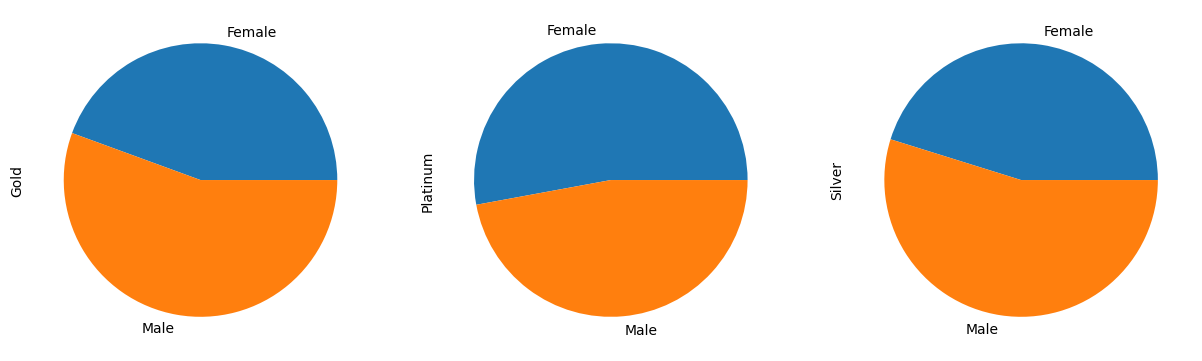

In [26]:
gender_segment.T.plot(kind = "pie", subplots = True, legend = False, figsize = (15,8))
plt.show()

12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be       compared using a bar chart

In [27]:
driver = cust_360.loc[cust_360['incident_cause'].isin(['Driver error','Other driver error'])]
group_gender = driver.groupby(['gender'])['claim_amount'].sum()
group_gender.nlargest(1)

gender
Male    3975407.75
Name: claim_amount, dtype: float32

Text(0, 0.5, 'Sum of claim amount')

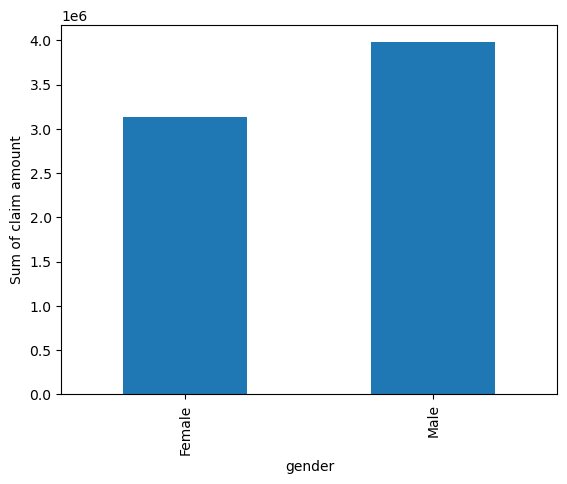

In [28]:
group_gender.plot(kind = 'bar')
plt.ylabel("Sum of claim amount")

### It can be clearly seen that male has claimed the most for any type of driver related issues.

13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

Text(0, 0.5, 'Count of fraudulent claims')

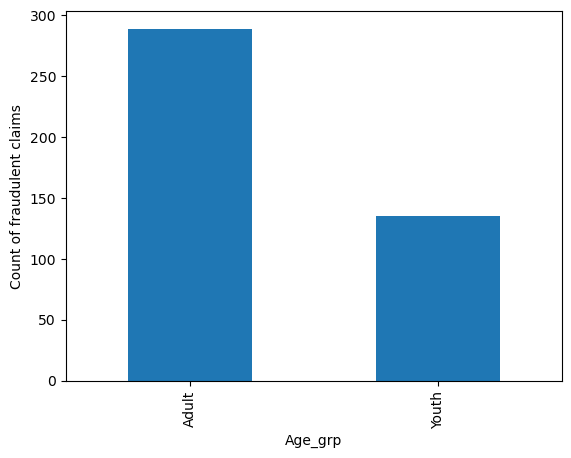

In [29]:
fraud = cust_360.loc[cust_360['fraudulent'] == 'Yes']
age_grp = fraud.groupby(['Age_grp'])['total_policy_claims'].sum()
age_grp.plot(kind = 'bar')
plt.ylabel("Count of fraudulent claims")

14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, 
    the month is in a chronological order not alphabetical order.

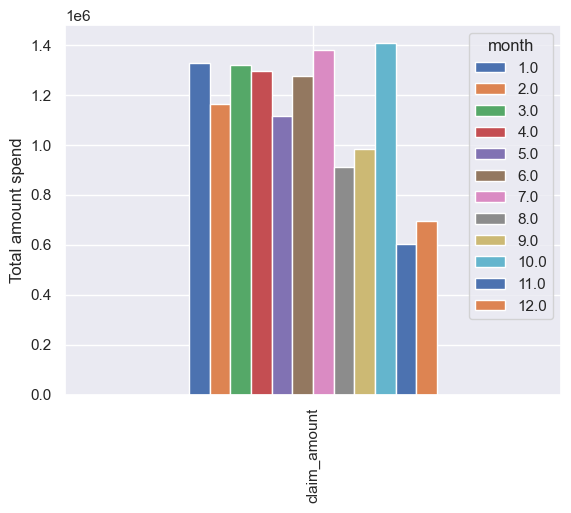

In [30]:
cust_360['claim_date'] = pd.to_datetime(cust_360['claim_date'])
cust_360['month'] = cust_360['claim_date'].dt.month
sns.set()
pd.pivot_table(cust_360,columns ='month',values="claim_amount",aggfunc='sum').plot(kind='bar')
plt.ylabel('Total amount spend')
plt.show()

15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, 
    one facet that represents fraudulent claims and the other for non-fraudulent claims. Based on the conclusions from        exploratory analysis as well as suitable statistical tests, answer the below questions. Please include a detailed write-up on the parameters taken into consideration, the Hypothesis testing steps, conclusion from the p-values and the business implications of the statements.

In [31]:
Avg_Claim_Amt = cust_360.groupby(["gender","Age_grp","fraudulent"])[["claim_amount"]].mean().reset_index()
Avg_Claim_Amt

,gender,Age_grp,fraudulent,claim_amount
0,Female,Adult,No,12373.063477
1,Female,Adult,Yes,12449.837891
2,Female,Children,No,20200.000000
3,Female,NaN,No,12501.489258
4,Female,Youth,No,12399.479492
5,Female,Youth,Yes,7760.313477
6,Male,Adult,No,12272.655273
7,Male,Adult,Yes,16804.634766
8,Male,Children,No,24610.000000
9,Male,NaN,No,12501.489258


In [32]:
Avg_Claim_Amt_Male = Avg_Claim_Amt.loc[ Avg_Claim_Amt.gender == 'Male', ['claim_amount','Age_grp','fraudulent'] ]
Avg_Claim_Amt_Female = Avg_Claim_Amt.loc[ Avg_Claim_Amt.gender == 'Female', ['claim_amount','Age_grp','fraudulent'] ]

In [33]:
Avg_Claim_Amt_Male_fraudulent = Avg_Claim_Amt_Male.loc[ Avg_Claim_Amt.fraudulent == 'Yes', ['claim_amount','Age_grp'] ]
Avg_Claim_Amt_Male_nonfraudulent = Avg_Claim_Amt_Male.loc[ Avg_Claim_Amt.fraudulent == 'No', ['claim_amount','Age_grp'] ]
Avg_Claim_Amt_Female_fraudulent = Avg_Claim_Amt_Female.loc[ Avg_Claim_Amt.fraudulent == 'Yes', ['claim_amount','Age_grp'] ]
Avg_Claim_Amt_Female_nonfraudulent = Avg_Claim_Amt_Female.loc[ Avg_Claim_Amt.fraudulent == 'No', ['claim_amount','Age_grp'] ]

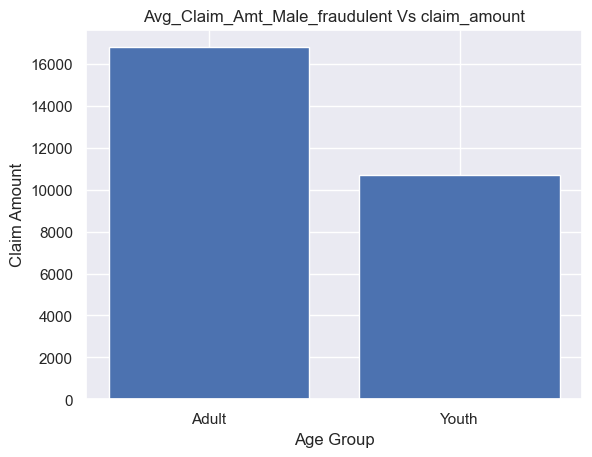

In [34]:
plt.bar(Avg_Claim_Amt_Male_fraudulent.Age_grp , Avg_Claim_Amt_Male_fraudulent.claim_amount)
plt.title('Avg_Claim_Amt_Male_fraudulent Vs claim_amount')
plt.xlabel('Age Group')
plt.ylabel('Claim Amount')
plt.show()

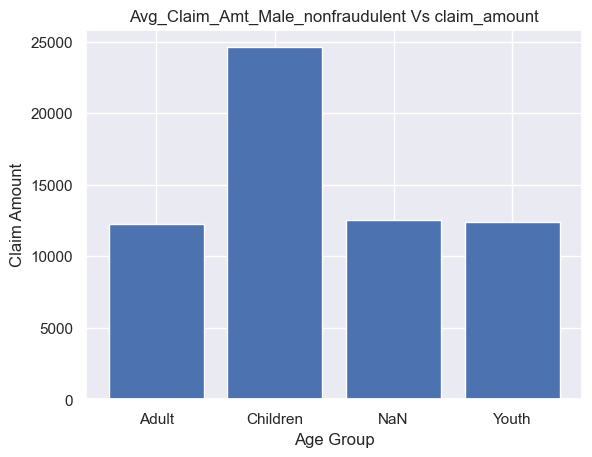

In [35]:
plt.bar(Avg_Claim_Amt_Male_nonfraudulent.Age_grp , Avg_Claim_Amt_Male_nonfraudulent.claim_amount)
plt.title('Avg_Claim_Amt_Male_nonfraudulent Vs claim_amount')
plt.xlabel('Age Group')
plt.ylabel('Claim Amount')
plt.show()

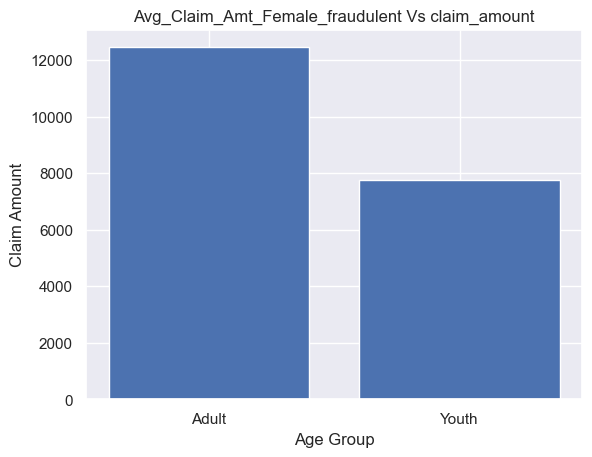

In [36]:
plt.bar(Avg_Claim_Amt_Female_fraudulent.Age_grp , Avg_Claim_Amt_Female_fraudulent.claim_amount)
plt.title('Avg_Claim_Amt_Female_fraudulent Vs claim_amount')
plt.xlabel('Age Group')
plt.ylabel('Claim Amount')
plt.show()

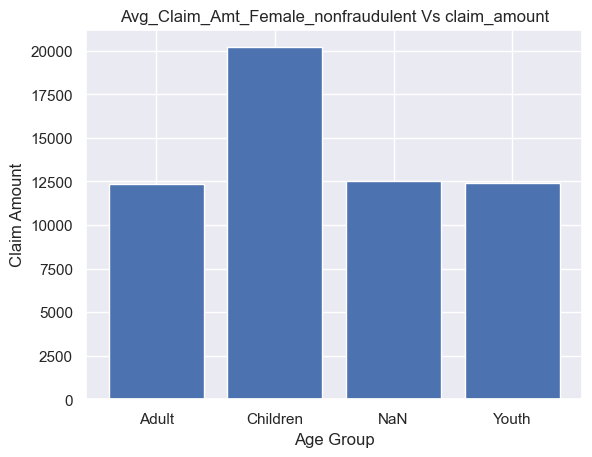

In [37]:
plt.bar(Avg_Claim_Amt_Female_nonfraudulent.Age_grp , Avg_Claim_Amt_Female_nonfraudulent.claim_amount)
plt.title('Avg_Claim_Amt_Female_nonfraudulent Vs claim_amount')
plt.xlabel('Age Group')
plt.ylabel('Claim Amount')
plt.show()

16. Is there any similarity in the amount claimed by males and females?

1. Ho - No relationship 
2. Ha - There is a relationship for the amount claimed by males and females 
3. Significance level - 5%

In [38]:
claim_male = cust_360['claim_amount'].loc[cust_360['gender']=="Male"]
claim_female = cust_360['claim_amount'].loc[cust_360['gender']=="Female"]

print("The average amount claimed by males is {}".format(claim_male.mean()))
print("The average amount claimed by females is {}".format(claim_female.mean()))

The average amount claimed by males is 12883.443359375
The average amount claimed by females is 12104.4599609375


In [39]:
import scipy.stats as stats

In [40]:
stats.ttest_ind( claim_male, claim_female )

Ttest_indResult(statistic=0.9629966126877386, pvalue=0.3357641882226343)

In [41]:
stats.f_oneway( claim_male, claim_female )

F_onewayResult(statistic=0.9273646073632528, pvalue=0.33576363313890256)

Since the significance value of the test is greater than 0.05, we fail to reject the alternate hypothesis and conclude that there is a similarity between male and female claim.

17. Is there any relationship between age category and segment?

1. Ho - No relationship 
2. Ha - There is a relationship between age category and segment 
3. Significance level - 5%

In [42]:
age_seg = pd.crosstab(cust_360.Age_grp, cust_360.Segment, margins = True)
age_seg

Segment,Gold,Platinum,Silver,All
Age_grp,,,,
Adult,268,244,246,758
Children,1,1,0,2
NaN,1,3,3,7
Youth,102,116,100,318
All,372,364,349,1085


In [43]:
test = stats.chi2_contingency(observed= age_seg)
test

Chi2ContingencyResult(statistic=4.202535990127086, pvalue=0.9794980273566717, dof=12, expected_freq=array([[2.59885714e+02, 2.54296774e+02, 2.43817512e+02, 7.58000000e+02],
       [6.85714286e-01, 6.70967742e-01, 6.43317972e-01, 2.00000000e+00],
       [2.40000000e+00, 2.34838710e+00, 2.25161290e+00, 7.00000000e+00],
       [1.09028571e+02, 1.06683871e+02, 1.02287558e+02, 3.18000000e+02],
       [3.72000000e+02, 3.64000000e+02, 3.49000000e+02, 1.08500000e+03]]))

Since the significance value of the test is greater than 0.05, we fail to reject the null hypothesis and conclude that there is no relation between age category and segment.

18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $1,00,000.

In [44]:
cust_360_new =  cust_360.groupby(["claim_date"])[["claim_amount"]].sum().reset_index()
cust_360_new['Month'] = cust_360_new['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
cust_360_new['Year'] = cust_360_new['claim_date'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))
cust_360_new

,claim_date,claim_amount,Month,Year
0,2017-01-01,203227.000000,January,2017
1,2017-01-07,135383.500000,January,2017
2,2017-01-14,138807.500000,January,2017
3,2017-01-21,72638.476562,January,2017
4,2017-01-27,57958.988281,January,2017
...,...,...,...,...
95,2018-10-03,187868.484375,October,2018
96,2018-10-09,225007.500000,October,2018
97,2018-10-16,119829.000000,October,2018
98,2018-10-23,147145.984375,October,2018


In [45]:
cust_360_new_2017 = cust_360_new.loc[ cust_360_new.Year == '2017', 'claim_amount' ].mean()
cust_360_new_2017

132685.95

In [46]:
cust_360_new_2018 = cust_360_new.loc[ cust_360_new.Year == '2018', 'claim_amount' ]

Ho - u <= 100000 Ha - u > 100000

CI - 95% p - 0.05

In [47]:
stats.ttest_1samp( cust_360_new_2018, 100000 )

TtestResult(statistic=4.844109653606526, pvalue=1.6106676772013998e-05, df=44)

Since pvalue is less than 0.05, we reject the null hypothesis. Spend on the Insurance Claims has increased from last year spend of $1,00,000

19. Is there any difference between age groups and insurance claims?

In [48]:
cust_360.Age_grp.value_counts()

Adult       758
Youth       318
NaN           7
Children      2
Name: Age_grp, dtype: int64

In [49]:
age_group_1 = cust_360['total_policy_claims'].loc[cust_360['Age_grp']=="Youth"]
age_group_2 = cust_360['total_policy_claims'].loc[cust_360['Age_grp']=="Adult"]
age_group_3 = cust_360['total_policy_claims'].loc[cust_360['Age_grp']=="NaN"]
age_group_4 = cust_360['total_policy_claims'].loc[cust_360['Age_grp']=="Children"]

anova = stats.f_oneway(age_group_1,age_group_2)

f = anova.statistic
p = anova.pvalue
print("The f-value is {} and the p value is {}".format(f,p))

The f-value is nan and the p value is nan


20. Is there any relationship between total number of policy claims and the claimed amount?

In [50]:
# Correlation
cust_360.total_policy_claims.corr(other=cust_360.claim_amount)

-0.02201993779218205

Hence total number of policy claims is inversely proportional to the claimed amount

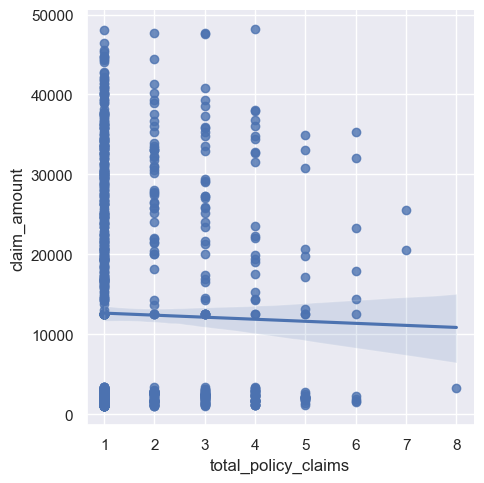

In [51]:
sns.lmplot(x = "total_policy_claims", y = "claim_amount",data = cust_360)